<a href="https://colab.research.google.com/github/ahlraf/307-assn2/blob/main/10000_trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Test 5

Number of trials = 10,000<br>
L = 32, 64 or 128<br>
p varies from 0.4 to 0.8 in steps of 0.02

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import os
import time
import pandas as pd

In [ ]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)  # for printing 32x32 lattice

## Implementation of Hoshen-Kopelman algorithm

In [ ]:
class Lattice():

    def __init__(self, L, p, n_trials):
        
        self.L = L  # lattice size
        self.n_trials = n_trials  # number of trials
        self.p = p  # probability
        
        self.current_step = 0
        self.N = self.L*self.L
        self.lattice = np.zeros((self.L, self.L), dtype=int)
        self.clusters = np.zeros(self.N)
        self.nonzero_clusters = []
        self.average_cluster = 0
        self.max_average_cluster = 0
        self.monte_carlo_step()


    def next_neighbour(self, i):
        if i<(self.L-1):
            nn = i + 1
        else:
            nn = i
        return nn


    def previous_neighbour(self, i):
        if i>0:
            pn = i-1
        else:
            pn = i
        return pn


    def top_neighbour(self, i, j):
        if i>0:
            tn = self.lattice[i-1][j]
        else:
            tn = 0
        return tn


    def left_neighbour(self, i, j):
        if j>0:
            ln = self.lattice[i][j-1]
        else:
            ln = 0
        return ln


    def monte_carlo_step(self):
        for i in range(self.L):
            for j in range(self.L):
                z = random.uniform(0, 1)
                if z < self.p:
                    self.lattice[i][j] = 1
                else:
                    self.lattice[i][j] = 0

In [ ]:
class Hoshen_Kopelman_Percolation(Lattice):

    def __init__(self, L, p, n_trials):
         super().__init__(L, p, n_trials)


    def HK_algorithm(self):
        
        # initial parameter for the Hoshen–Kopelman algorithm
        k = 2
        
        for i in range(self.L):
            for j in range(self.L):
                if self.lattice[i][j] == 1:
                    tn = self.top_neighbour(i, j)
                    ln = self.left_neighbour(i, j)
                    
                    if tn == 0 and ln == 0:
                        self.lattice[i][j] = k
                        self.clusters[k] = 1
                        k += 1
                        
                    elif tn==0 and ln!=0:
                        self.lattice[i][j] = ln
                        self.clusters[ln] += 1
                        
                    elif tn!=0 and ln==0:
                        self.lattice[i][j] = tn
                        self.clusters[tn] += 1
                        
                    elif tn!=0 and ln!=0 and tn==ln:
                        self.lattice[i][j] = tn
                        self.clusters[tn] += 1
                        
                    else:
                        self.lattice[i][j] = ln
                        self.clusters[ln] = self.clusters[ln] + self.clusters[tn] + 1
                        self.clusters[tn] = 0



    def HK_simulate(self):

        while self.current_step < self.n_trials:
            self.monte_carlo_step()

            for i in range(len(self.clusters)):
                self.clusters[i] = 0

            self.HK_algorithm()
            self.nonzero_clusters = self.clusters[self.clusters!=0]

            if len(self.nonzero_clusters) != 0:
                self.average_cluster += sum(self.nonzero_clusters)/len(self.nonzero_clusters)
                self.max_average_cluster += max(self.nonzero_clusters)

            self.current_step += 1

        self.max_average_cluster = self.max_average_cluster/self.n_trials
        self.average_cluster = self.average_cluster/self.n_trials

In [ ]:
def hoshen_kopelman(L, n_trials, p_init, p_final, delta_p, p_list, mac_list, ac_list):
    # L = lattice size
    
    # p varies from p_init to p_final in steps of delta_p
    p = p_init  # initialization
    
    while p < p_final:
        lattice = Hoshen_Kopelman_Percolation(L, p, n_trials)
        lattice.HK_simulate()
        p_list.append(round(p, 3))
        mac_list.append(lattice.max_average_cluster)
        ac_list.append(lattice.average_cluster)
        p += delta_p  

### Plotting functions

In [ ]:
def plot_max_cluster(L, n_trials, p_list, mac_list, ac_list):
    axes = plt.gca()
    axes.set_xlim([0,1])

    plt.scatter(p_list, mac_list,label=f"L={L}, # trials={n_trials}")
    
    plt.legend()
    plt.xlabel('p')
    plt.ylabel('Average size of maximum cluster')
    plt.grid(linewidth=0.5)
    plt.savefig('plot_maximum_cluster.png')

In [ ]:
def plot_average_cluster(L, n_trials, p_list, mac_list, ac_list):
    axes = plt.gca()
    axes.set_xlim([0,1])

    plt.scatter(p_list, ac_list,label=f"L={L}, # trials={n_trials}")

    plt.legend()
    plt.xlabel('p')
    plt.ylabel('Average size of average cluster')
    plt.grid(linewidth=0.5)
    plt.savefig('plot_average_cluster.png')

In [ ]:
n_trials = 10000

<hr>

### L = 32

 ### Cluster configuration*** (part (a)))

In [ ]:
# lattice configuration
p = 0.42  # arbitrary

print("Initial lattice\n")
lattice = Hoshen_Kopelman_Percolation(32, p, n_trials)
print(lattice.lattice)

print("\nClusters by Hoshen-Kopelman algorithm\n")
lattice.HK_simulate()
print(lattice.lattice)

Initial lattice

[[0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0]
 [1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1]
 [1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0]
 [1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1]
 [1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0]
 [1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0]
 [0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1]
 [0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0]
 [0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1]
 [0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1]
 [0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1]
 [1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0

***Average cluster size***

In [ ]:
p32, mac32, ac32 = [], [], []
hoshen_kopelman(32, 1000, 0.4, 0.82, 0.02, p32, mac32, ac32)

df32 = pd.DataFrame()
df32["Probability"] = p32
df32["Avg size of max cluster"] = mac32
df32["Avg size of avg cluster"] = ac32

print(df32)

    Probability  Avg size of max cluster  Avg size of avg cluster
0          0.40                   28.945                 3.446668
1          0.42                   34.294                 3.821089
2          0.44                   39.387                 4.253943
3          0.46                   46.264                 4.745727
4          0.48                   55.481                 5.329248
5          0.50                   65.790                 6.057744
6          0.52                   77.928                 6.961963
7          0.54                   93.185                 7.980469
8          0.56                  115.142                 9.350662
9          0.58                  137.263                10.952377
10         0.60                  170.704                12.962553
11         0.62                  203.612                15.521652
12         0.64                  250.031                18.833129
13         0.66                  299.246                22.805359
14        

***Plotting average size of maximum cluster against p for L = 32***

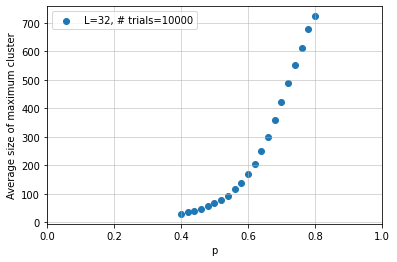

In [ ]:
plot_max_cluster(32, n_trials, p32, mac32, ac32)

***Plotting average size of average cluster against p for L = 32***

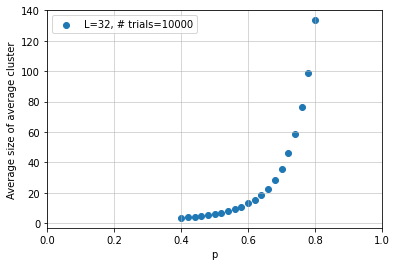

In [ ]:
plot_average_cluster(32, n_trials, p32, mac32, ac32)

<hr>

### L = 64

***Average cluster size***

In [ ]:
p64, mac64, ac64 = [], [], []
hoshen_kopelman(64, 1000, 0.4, 0.82, 0.02, p64, mac64, ac64)

df64 = pd.DataFrame()
df64["Probability"] = p64
df64["Avg size of max cluster"] = mac64
df64["Avg size of avg cluster"] = ac64

print(df64)

    Probability  Avg size of max cluster  Avg size of avg cluster
0          0.40                   41.494                 3.558404
1          0.42                   48.874                 3.955212
2          0.44                   58.580                 4.401286
3          0.46                   69.620                 4.949462
4          0.48                   83.690                 5.624621
5          0.50                  101.318                 6.397621
6          0.52                  124.015                 7.365187
7          0.54                  156.840                 8.532710
8          0.56                  196.297                10.044568
9          0.58                  246.868                11.932192
10         0.60                  323.004                14.250548
11         0.62                  415.603                17.434449
12         0.64                  542.127                21.301339
13         0.66                  699.678                26.660395
14        

***Plotting average size of maximum cluster against p for L = 64***

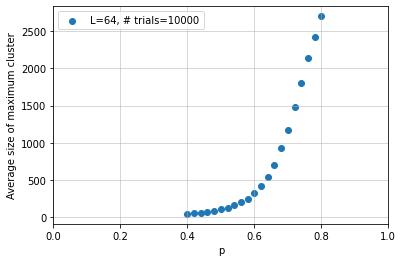

In [ ]:
plot_max_cluster(64, n_trials, p64, mac64, ac64)

***Plotting average size of average cluster against p for L = 64***

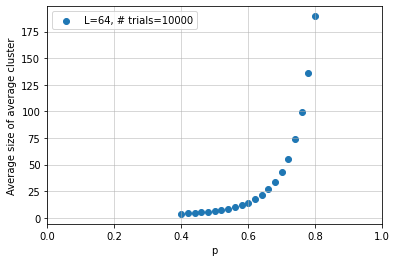

In [ ]:
plot_average_cluster(64, n_trials, p64, mac64, ac64)

<hr>

### L = 128

***Average cluster size***

In [ ]:
p128, mac128, ac128 = [], [], []
hoshen_kopelman(128, 1000, 0.4, 0.82, 0.02, p128, mac128, ac128)

df128 = pd.DataFrame()
df128["Probability"] = p128
df128["Avg size of max cluster"] = mac128
df128["Avg size of avg cluster"] = ac128

print(df128)

    Probability  Avg size of max cluster  Avg size of avg cluster
0          0.40                   54.174                 3.611533
1          0.42                   64.694                 4.024053
2          0.44                   77.513                 4.500073
3          0.46                   93.048                 5.061561
4          0.48                  116.128                 5.764664
5          0.50                  141.407                 6.594115
6          0.52                  176.740                 7.627029
7          0.54                  226.670                 8.888311
8          0.56                  292.095                10.491866
9          0.58                  382.999                12.544660
10         0.60                  503.729                15.108538
11         0.62                  697.191                18.477487
12         0.64                  955.877                23.007193
13         0.66                 1337.891                29.019538
14        

***Plotting average size of maximum cluster against p for L = 128***

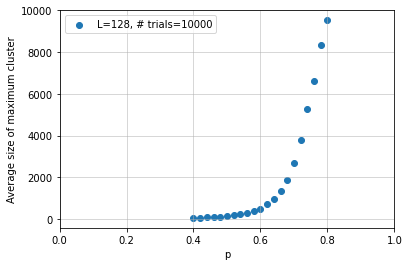

In [ ]:
plot_max_cluster(128, n_trials, p128, mac128, ac128)

***Plotting average size of average cluster against p for L = 128***

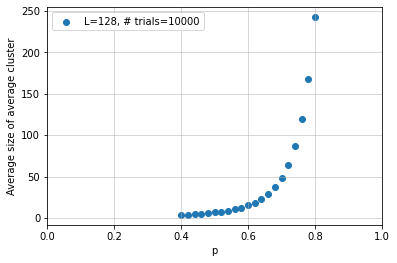

In [ ]:
plot_average_cluster(128, n_trials, p128, mac128, ac128)

<hr>

### Combined plots (part (b))

***Plotting average size of maximum cluster against p for L = 32, 64, 128***

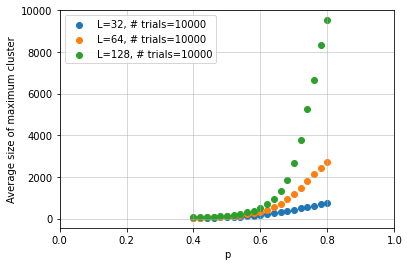

In [ ]:
plot_max_cluster(32, n_trials, p32, mac32, ac32)
plot_max_cluster(64, n_trials, p64, mac64, ac64)
plot_max_cluster(128, n_trials, p128, mac128, ac128)

***Plotting average size of average cluster against p for L = 32, 64, 128***

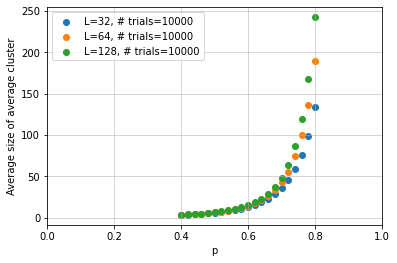

In [ ]:
plot_average_cluster(32, n_trials, p32, mac32, ac32)
plot_average_cluster(64, n_trials, p64, mac64, ac64)
plot_average_cluster(128, n_trials, p128, mac128, ac128)